### EMBEDDING MODELS


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### GloVe Model Example

**Training glove model on your own corpus**

In [ ]:
!pip install -qqq glove-python3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.0/327.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


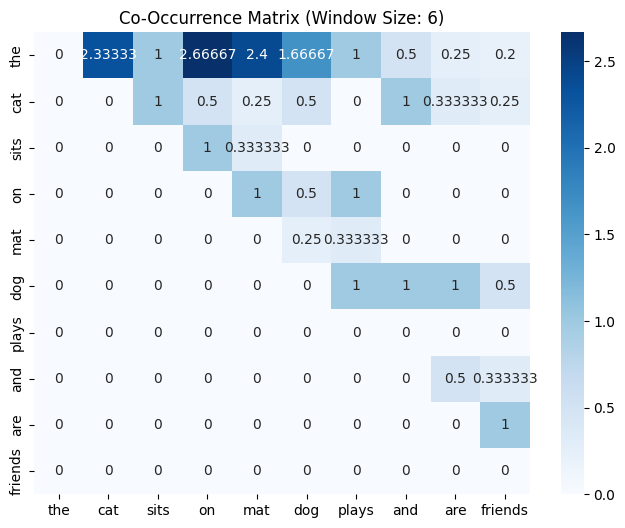


Word Embeddings:
the: [ 0.03792482 -0.00556578 -0.02482012 -0.0076118  -0.02211505  0.02084521
 -0.00836935  0.03280797 -0.00072717 -0.00891863 -0.03657555 -0.00892686]
cat: [ 0.01161115  0.03143482  0.0129327  -0.02847517  0.02242724 -0.02774187
 -0.01475741 -0.02896856  0.00852665 -0.0144062   0.01026257  0.02921189]
sits: [-0.00970853 -0.02050814 -0.00757328 -0.02167486 -0.00130813  0.00569257
  0.00746643 -0.03138376 -0.02004549  0.03577035  0.01925581  0.03105756]
on: [ 0.04070349 -0.01798453 -0.03639361  0.01470827 -0.03485936  0.02364071
  0.03389902  0.03488152 -0.00063981 -0.02376296  0.00717117  0.03382157]
mat: [-0.02221233  0.0367371  -0.01944546 -0.01182918 -0.0332085   0.00714073
 -0.03750899  0.0281961  -0.01498916 -0.02756933 -0.03738279  0.02905669]
dog: [-0.02829428 -0.02336882  0.04036781 -0.03534938 -0.0281938  -0.03539761
 -0.04143599  0.03555982  0.0408916   0.03578445  0.00508962 -0.04407475]
plays: [-0.02800723  0.01846694  0.01668467  0.03068412  0.03621496  0

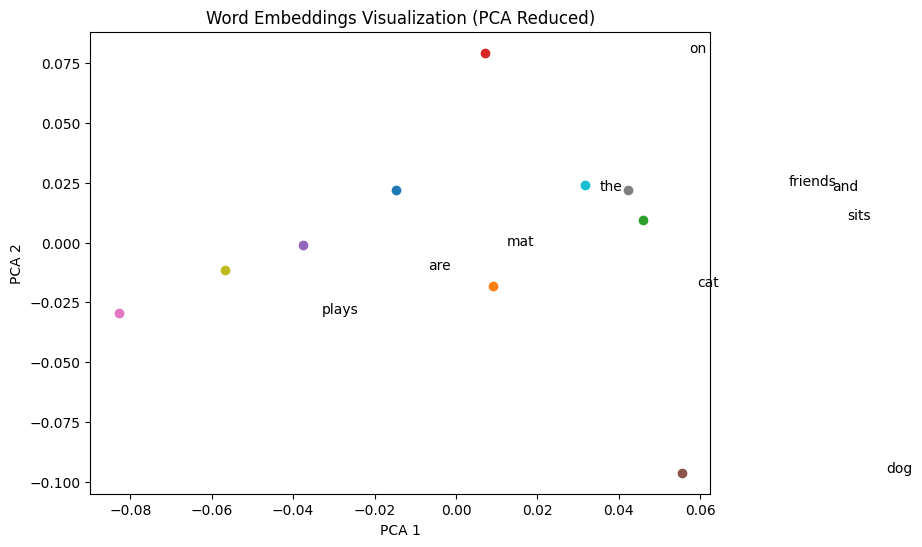

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glove import Corpus, Glove

# Step 1: Define a toy dataset
sentences = [
    "the cat sits on the mat",
    "the dog plays on the mat",
    "the cat and dog are friends"
]

# Step 2: Tokenize sentences
tokenized_sentences = [sentence.split() for sentence in sentences]

# Step 3: Generate co-occurrence matrix
window_size = 6  # Play with this parameter to change context size
corpus = Corpus()
corpus.fit(tokenized_sentences, window=window_size)

# Convert co-occurrence matrix to DataFrame for better visualization
vocab = list(corpus.dictionary.keys())  # Vocabulary
cooccurrence_matrix = corpus.matrix.toarray()  # Convert sparse matrix to numpy array
cooccurrence_df = pd.DataFrame(cooccurrence_matrix, index=vocab, columns=vocab)

# Step 4: Visualize the co-occurrence matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cooccurrence_df, annot=True, cmap="Blues", fmt="g")
plt.title(f"Co-Occurrence Matrix (Window Size: {window_size})")
plt.show()

# Step 5: Train GloVe to generate word embeddings
embedding_dim = 12  # Play with this parameter to control embedding size
glove = Glove(no_components=embedding_dim, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=False)
glove.add_dictionary(corpus.dictionary)

# Step 6: Visualize word embeddings for each word
print("\nWord Embeddings:")
for word in vocab:
    embedding = glove.word_vectors[glove.dictionary[word]]
    print(f"{word}: {embedding}")

# Step 7: Visualize embeddings using a scatter plot (2D projection)
from sklearn.decomposition import PCA

# Reduce embeddings to 2 dimensions for visualization
embeddings = glove.word_vectors
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot embeddings
plt.figure(figsize=(8, 6))
for i, word in enumerate(vocab):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.05, reduced_embeddings[i, 1], word)

plt.title("Word Embeddings Visualization (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()



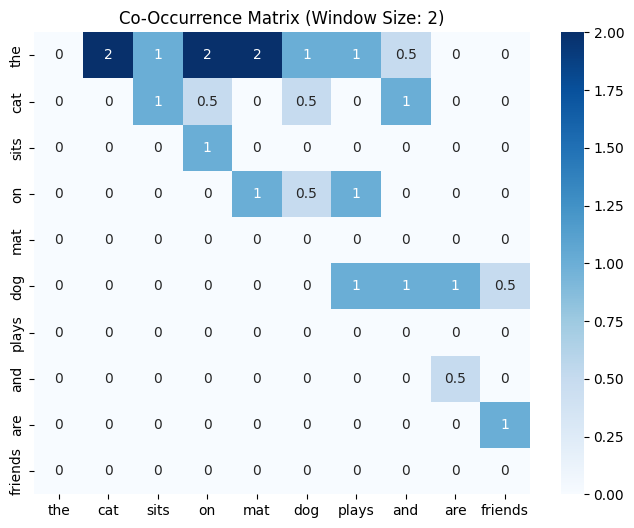


Word Embeddings:
the: [-0.03594227 -0.06135349  0.02893287 -0.04230979  0.03331273 -0.01707876
  0.01549238 -0.04450145]
cat: [-0.06169562 -0.02903753 -0.03276714 -0.01895365  0.02002144 -0.00097252
 -0.02024254 -0.01817581]
sits: [ 0.00922276  0.02846344 -0.02891923  0.03162849  0.04286868 -0.03852464
 -0.05583363  0.02224957]
on: [-0.06134729 -0.04884666  0.03748095  0.01348547  0.01274619  0.03429891
 -0.01546604  0.03651611]
mat: [ 0.0483251  -0.05678979 -0.00925641 -0.00085422  0.06115035  0.00116099
  0.00588419 -0.00686658]
dog: [ 0.02137964 -0.02907866 -0.03617695  0.0527847   0.05259661  0.02160191
 -0.05660848 -0.0245511 ]
plays: [-0.02376026 -0.03044178 -0.02423397 -0.00513497  0.03079419 -0.03095053
 -0.04217045 -0.02662587]
and: [ 0.05976761 -0.03373647  0.0550078   0.04394515  0.04564191 -0.05621623
 -0.00333107  0.04597238]
are: [ 0.04391546 -0.01427792  0.01717475  0.02234033  0.00609621  0.0267317
  0.05505746  0.01336231]
friends: [-0.00314106  0.04847648 -0.02336832

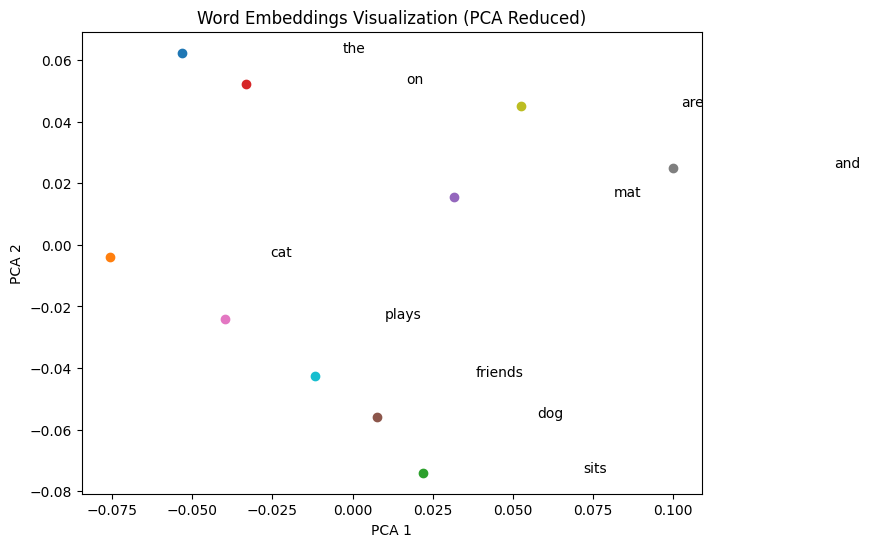

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glove import Corpus, Glove

# Step 1: Define a toy dataset
sentences = [
    "the cat sits on the mat",
    "the dog plays on the mat",
    "the cat and dog are friends"
]

# Step 2: Tokenize sentences
tokenized_sentences = [sentence.split() for sentence in sentences]

# Step 3: Generate co-occurrence matrix
window_size = 2  # Play with this parameter to change context size
corpus = Corpus()
corpus.fit(tokenized_sentences, window=window_size)

# Convert co-occurrence matrix to DataFrame for better visualization
vocab = list(corpus.dictionary.keys())  # Vocabulary
cooccurrence_matrix = corpus.matrix.toarray()  # Convert sparse matrix to numpy array
cooccurrence_df = pd.DataFrame(cooccurrence_matrix, index=vocab, columns=vocab)

# Step 4: Visualize the co-occurrence matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cooccurrence_df, annot=True, cmap="Blues", fmt="g")
plt.title(f"Co-Occurrence Matrix (Window Size: {window_size})")
plt.show()

# Step 5: Train GloVe to generate word embeddings
embedding_dim = 8  # Play with this parameter to control embedding size
glove = Glove(no_components=embedding_dim, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=False)
glove.add_dictionary(corpus.dictionary)

# Step 6: Visualize word embeddings for each word
print("\nWord Embeddings:")
for word in vocab:
    embedding = glove.word_vectors[glove.dictionary[word]]
    print(f"{word}: {embedding}")

# Step 7: Visualize embeddings using a scatter plot (2D projection)
from sklearn.decomposition import PCA

# Reduce embeddings to 2 dimensions for visualization
embeddings = glove.word_vectors
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot embeddings
plt.figure(figsize=(8, 6))
for i, word in enumerate(vocab):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.05, reduced_embeddings[i, 1], word)

plt.title("Word Embeddings Visualization (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


### BERT Embedding Model

https://python.plainenglish.io/how-to-generate-word-embedding-using-bert-2b9e79c27396

In [ ]:
%pip install -qqq transformers

In [ ]:
import random
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
text = "This is an example sentence."
tokens = tokenizer.tokenize(text)
print(tokens)

['this', 'is', 'an', 'example', 'sentence', '.']


In [ ]:
input_ids = tokenizer.convert_tokens_to_ids(tokens)
print(input_ids)

[2023, 2003, 2019, 2742, 6251, 1012]


In [ ]:
import torch

input_ids = torch.tensor(input_ids).unsqueeze(0)
with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs.last_hidden_state[0]
    print(embeddings)

tensor([[-1.8824e-01, -7.6451e-04,  1.0336e-01,  ..., -2.0809e-01,
         -3.9280e-01,  7.9072e-01],
        [-4.1441e-01, -1.7607e-01,  5.4727e-02,  ..., -1.0659e-01,
         -3.8406e-01,  7.9451e-01],
        [-5.5160e-01,  1.7656e-01,  2.4592e-01,  ...,  1.5594e-01,
         -5.1121e-01,  1.3524e+00],
        [-2.6705e-01,  2.0308e-01, -3.6436e-02,  ..., -9.6218e-02,
         -5.8836e-01,  6.6819e-01],
        [-1.7557e-01,  1.8462e-01,  3.5970e-02,  ..., -1.4965e-01,
         -3.1363e-01,  6.9866e-01],
        [-1.6752e-01, -3.2122e-01,  7.4659e-02,  ..., -2.1811e-01,
         -3.7288e-01,  7.0560e-01]])
